### 📊 **Feature Description & Types**

Below is an analysis of each feature in the dataset, including its type and purpose:

---

- **`id`**: *Unique identifier for each patient.*  
  ➤ **Categorical** *(used as an identifier, not a model input)*

- **`gender`**: *Gender of the patient (Male/Female/Other).*  
  ➤ **Categorical**

- **`age`**: *Age of the patient.*  
  ➤ **Numerical** *(continuous)*

- **`hypertension`**: *Whether the patient has hypertension (0 = No, 1 = Yes).*  
  ➤ **Categorical** *(binary)*

- **`heart_disease`**: *Whether the patient has heart disease (0 = No, 1 = Yes).*  
  ➤ **Categorical** *(binary)*

- **`ever_married`**: *Marital status (Yes/No).*  
  ➤ **Categorical**

- **`work_type`**: *Type of work (Private, Self-employed, Govt_job, Children, Never_worked).*  
  ➤ **Categorical**

- **`Residence_type`**: *Type of residence (Urban/Rural).*  
  ➤ **Categorical**

- **`avg_glucose_level`**: *Average glucose level in blood.*  
  ➤ **Numerical** *(continuous)*

- **`bmi`**: *Body Mass Index.*  
  ➤ **Numerical** *(may have missing values)*

- **`smoking_status`**: *Smoking status (formerly smoked, never smoked, smokes, Unknown).*  
  ➤ **Categorical**

- **`stroke`**: *Target variable indicating whether the patient had a stroke (0 = No, 1 = Yes).*  
  ➤ **Categorical** *(binary target)*


In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier #Import KNN Classifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import plotly.express as px
from sklearn.svm import SVC
from scipy.stats import shapiro
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score, classification_report


# importing module
import warnings
# ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  1. Data Exploration and Visualization

In this section, we explore the dataset's structure, distribution of features, and relationships using visualizations like heatmaps, scatter plots, and dimensionality reduction techniques such as PCA, LDA, and t-SNE.


In [3]:
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.shape

(5110, 12)

In [5]:
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}") #Returns the total number of duplicated records in the dataset.

Number of duplicate rows: 0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


<Axes: >

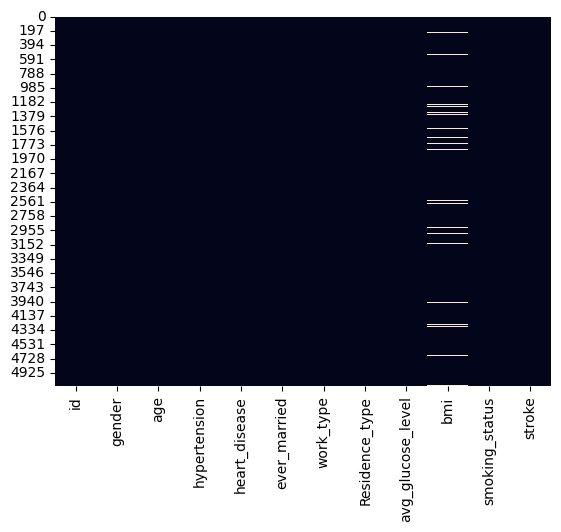

In [8]:
sns.heatmap(df.isnull(), cbar=False)

In [9]:
#statistics of numerical data
df.describe(exclude='object')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


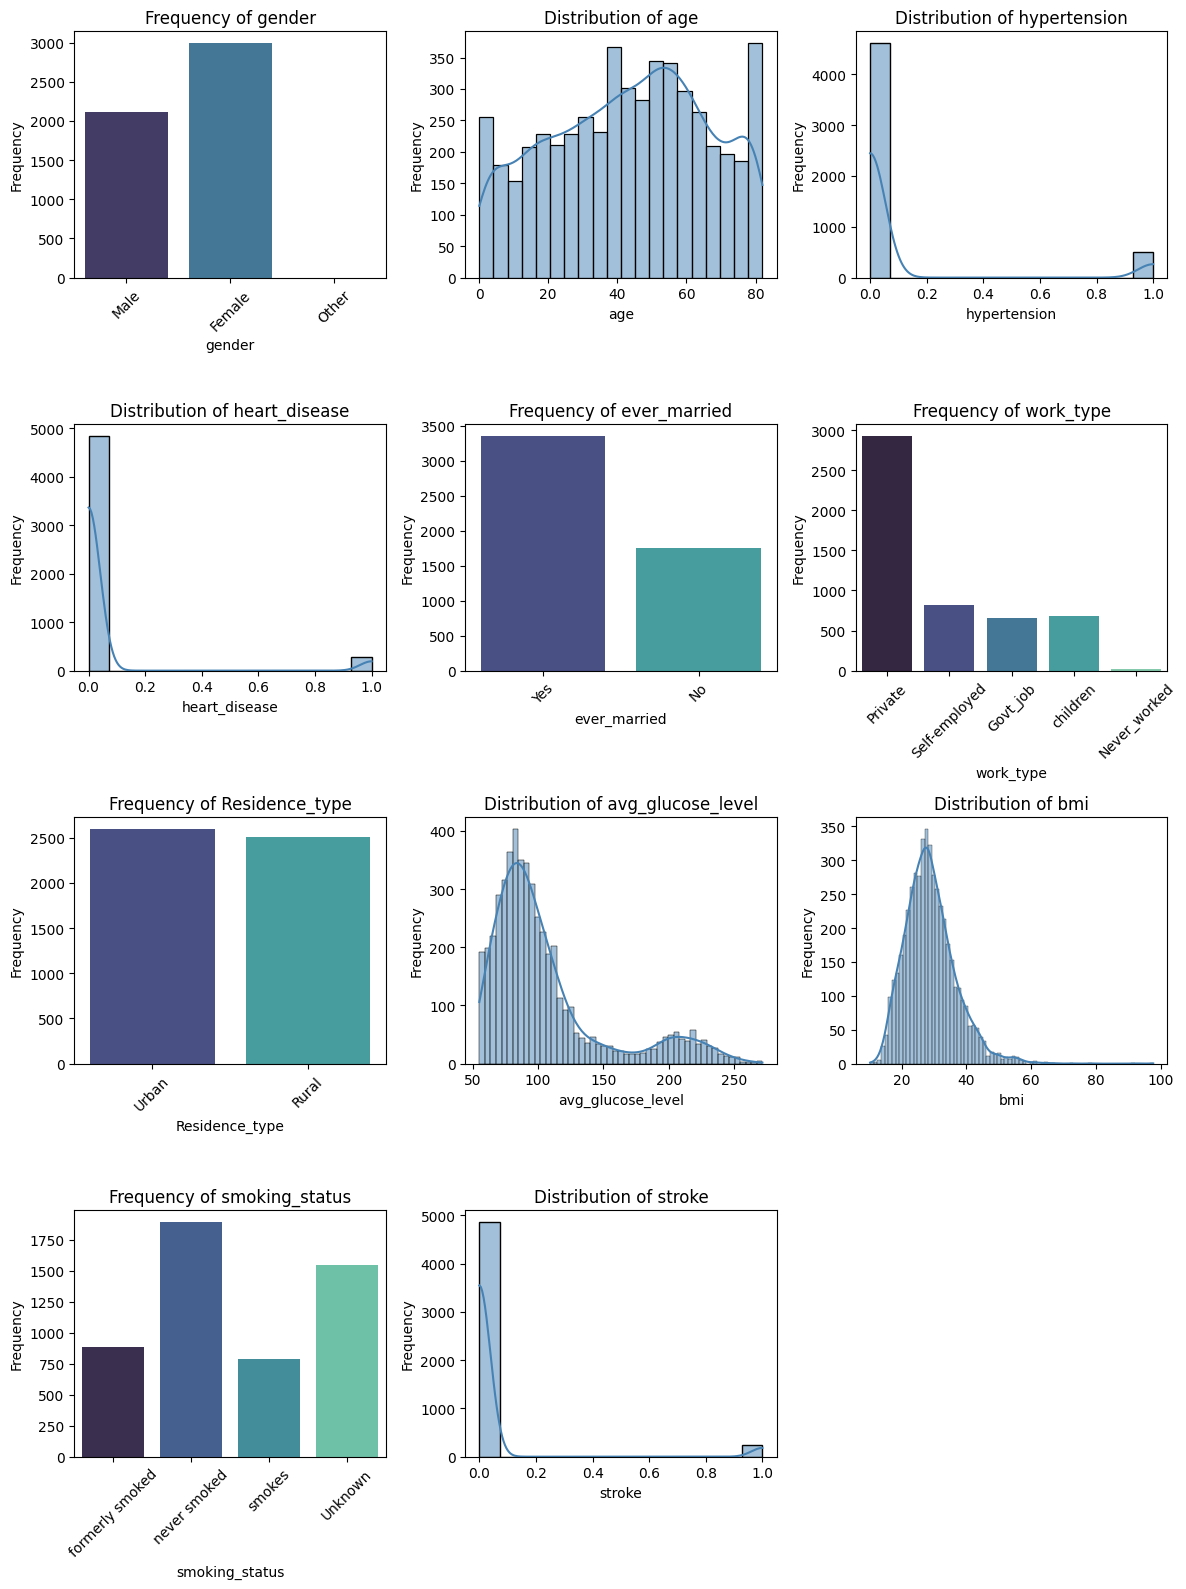

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'id' column
cols_to_plot = [col for col in df.columns if col != 'id']

n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    ax = axes[i]

    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        sns.countplot(x=df[col], ax=ax, hue=df[col], palette='mako', legend=False)
        ax.set_title(f'Frequency of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)
    else:
        sns.histplot(df[col], kde=True, ax=ax, color='steelblue')
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(cols_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

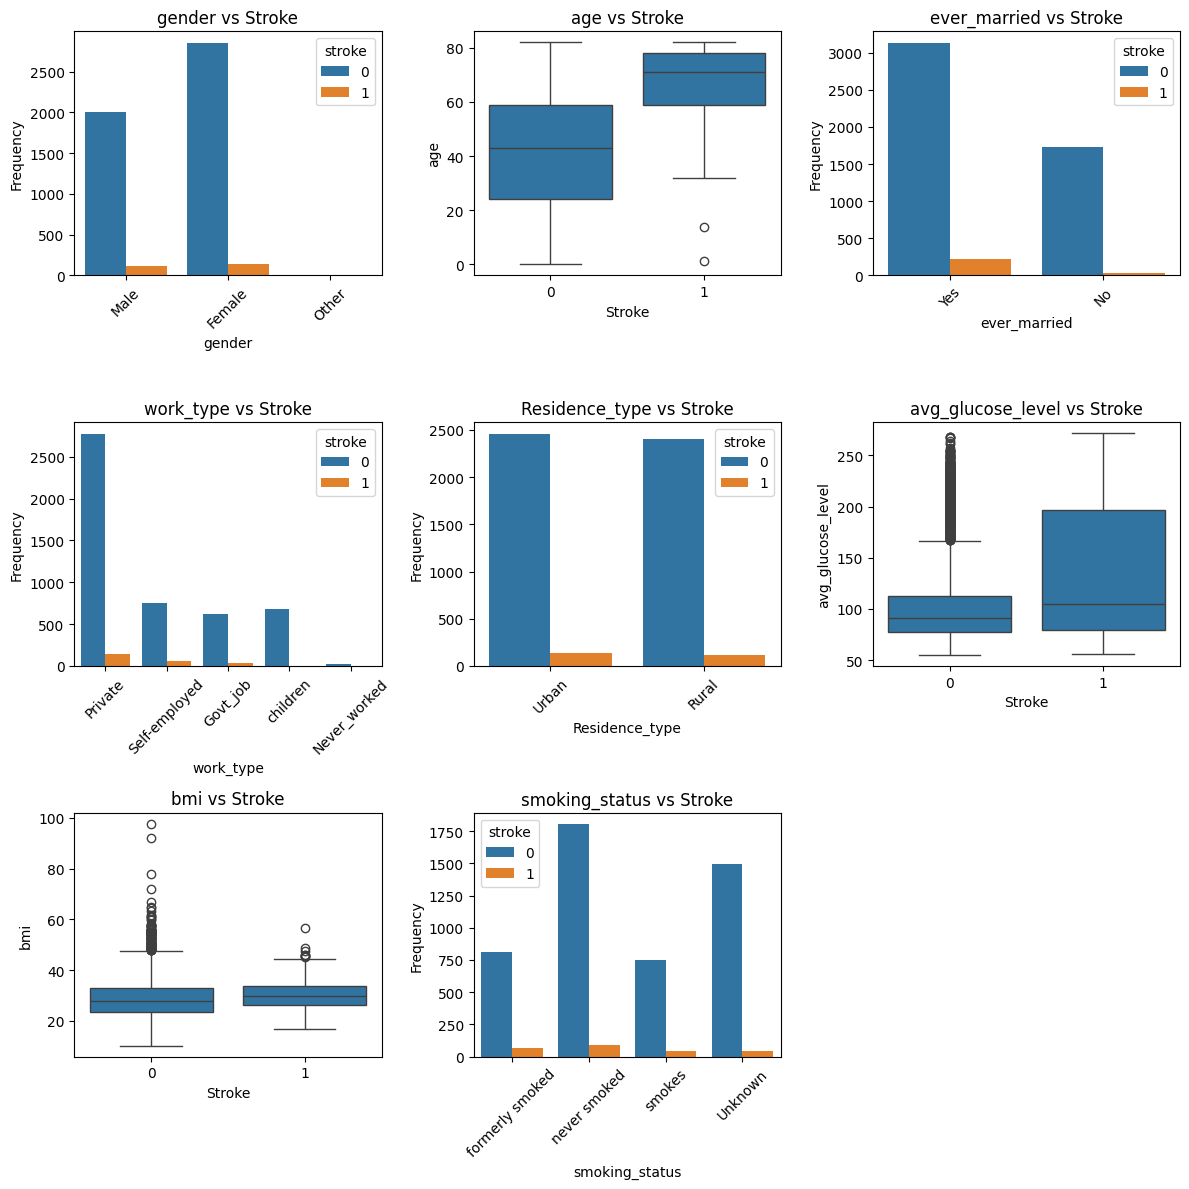

In [11]:
# Filter columns excluding 'id' and 'stroke'
cols_to_plot = [col for col in df.columns if col not in ['id', 'stroke', 'heart_disease', 'hypertension']]

n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        sns.countplot(x=col, hue='stroke', data=df, ax=ax)
        ax.set_xlabel(col)
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylabel('Frequency')
    else:
        sns.boxplot(x='stroke', y=col, data=df, ax=ax)
        ax.set_xlabel('Stroke')
        ax.set_ylabel(col)

    ax.set_title(f'{col} vs Stroke')

# Hide any remaining empty subplots
for j in range(len(cols_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


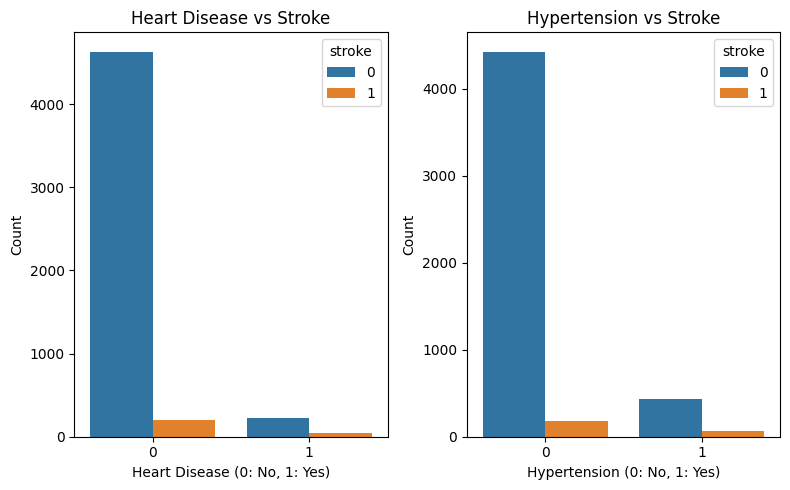

In [12]:
#visualizing binary columns (Heart Disease and Hypertension)
n_cols = 2
n_rows = 1
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 5))

sns.countplot(x='heart_disease', hue='stroke', data=df, ax=axes[0])
axes[0].set_title('Heart Disease vs Stroke')
axes[0].set_xlabel('Heart Disease (0: No, 1: Yes)')
axes[0].set_ylabel('Count')

sns.countplot(x='hypertension', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Hypertension vs Stroke')
axes[1].set_xlabel('Hypertension (0: No, 1: Yes)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


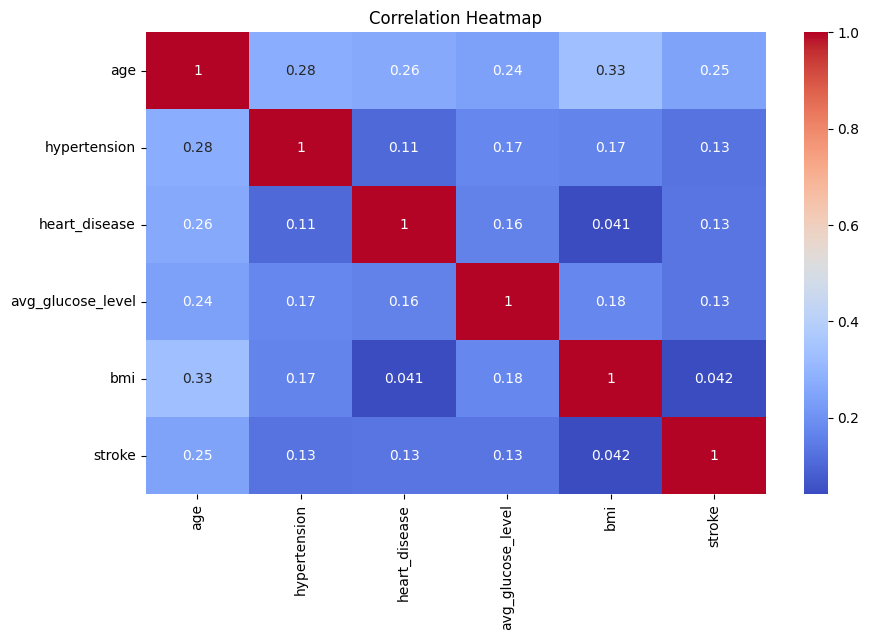

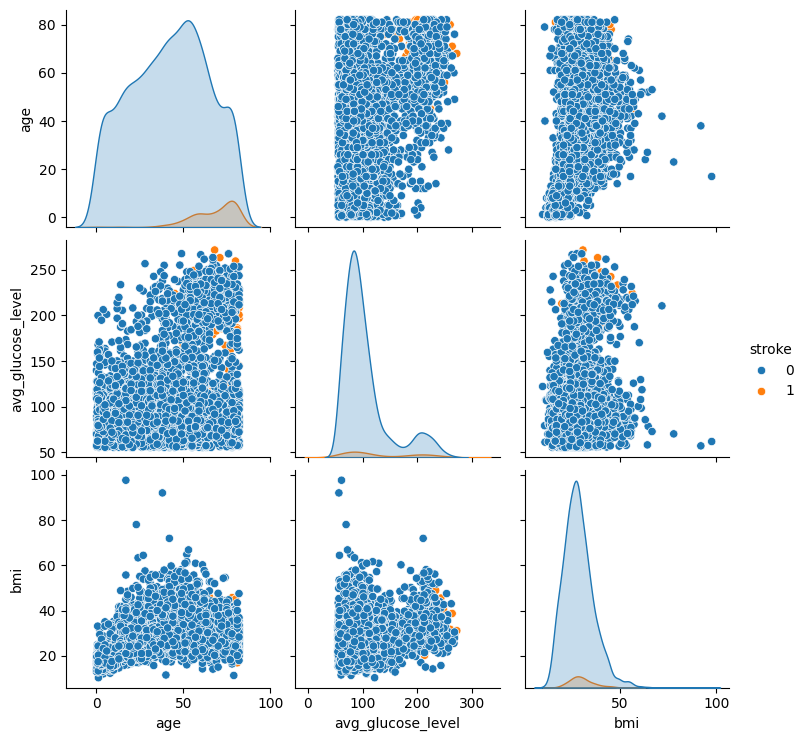

In [13]:
# Drop 'id' column for correlation heatmap
df_numeric = df.drop(columns=['id'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pair plot for selected features excluding 'id'
selected_features = ['age', 'avg_glucose_level', 'bmi', 'stroke']
sns.pairplot(df[selected_features], hue='stroke')
plt.show()

## Feature Reduction

In [14]:
# Encode categorical features
df_clean = df.drop(columns=['id'])
df_clean['bmi'].fillna(df_clean['bmi'].mean(), inplace=True)
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Scale data
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']
X_scaled = StandardScaler().fit_transform(X)


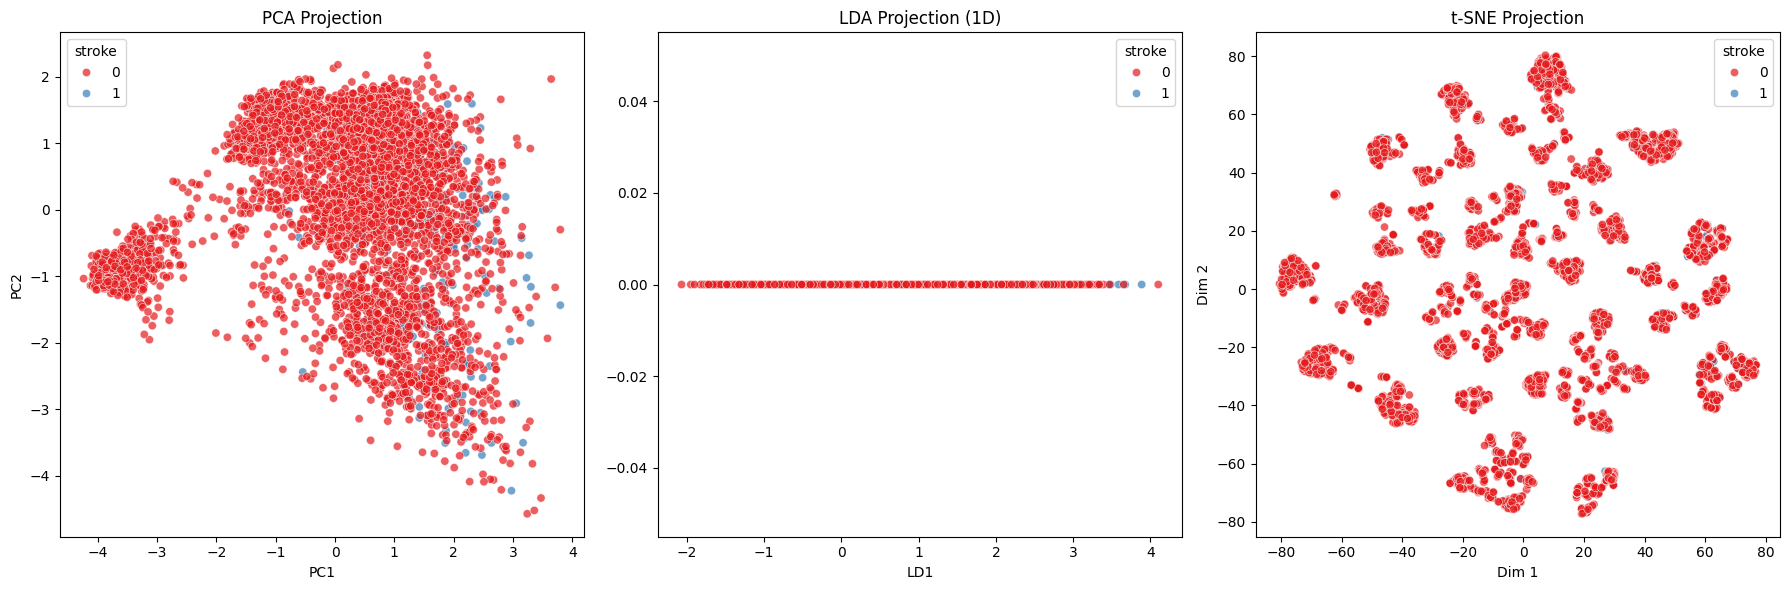

In [15]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#lda
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# PCA plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', ax=axs[0], alpha=0.7)
axs[0].set_title('PCA Projection')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

# LDA plot
sns.scatterplot(x=X_lda[:, 0], y=np.zeros_like(X_lda[:, 0]), hue=y, palette='Set1', ax=axs[1], alpha=0.7)
axs[1].set_title('LDA Projection (1D)')
axs[1].set_xlabel('LD1')
axs[1].set_ylabel('')


# t-SNE plot
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set1', ax=axs[2], alpha=0.7)
axs[2].set_title('t-SNE Projection')
axs[2].set_xlabel('Dim 1')
axs[2].set_ylabel('Dim 2')

plt.tight_layout()
plt.show()


In [16]:
# using orthogonal components to visualize the lda in 2D

lda_direction = lda.coef_[0]
lda_direction = lda_direction / np.linalg.norm(lda_direction)

X_orthogonal = X_scaled - np.outer(X_lda.flatten(), lda_direction)

pca_orthogonal = PCA(n_components=1)
X_lda_2d = pca_orthogonal.fit_transform(X_orthogonal)

X_lda_2d = np.column_stack((X_lda, X_lda_2d))

# Create LDA DataFrame for visualization
lda_df = pd.DataFrame(data=X_lda_2d, columns=['LD1', 'LD2'])
lda_df['stroke'] = df['stroke'].reset_index(drop=True)
plt.figure(figsize=(8, 5))


<Axes: xlabel='LD1', ylabel='LD2'>

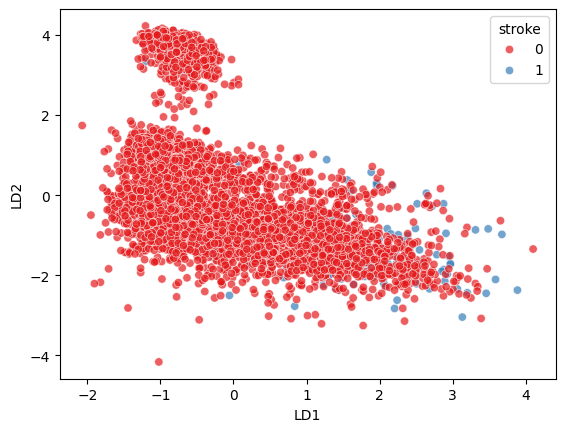

In [56]:
sns.scatterplot(x='LD1', y='LD2', hue='stroke', data=lda_df, palette='Set1', alpha=0.7)

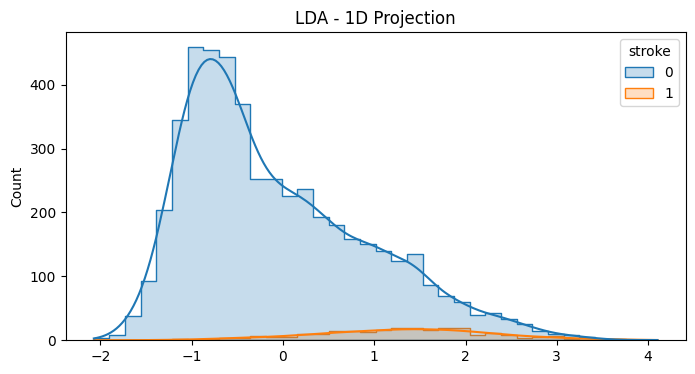

In [18]:
# LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)
plt.figure(figsize=(8,4))
sns.histplot(x=X_lda[:,0], hue=y, element="step", kde=True)
plt.title("LDA - 1D Projection")
plt.show()

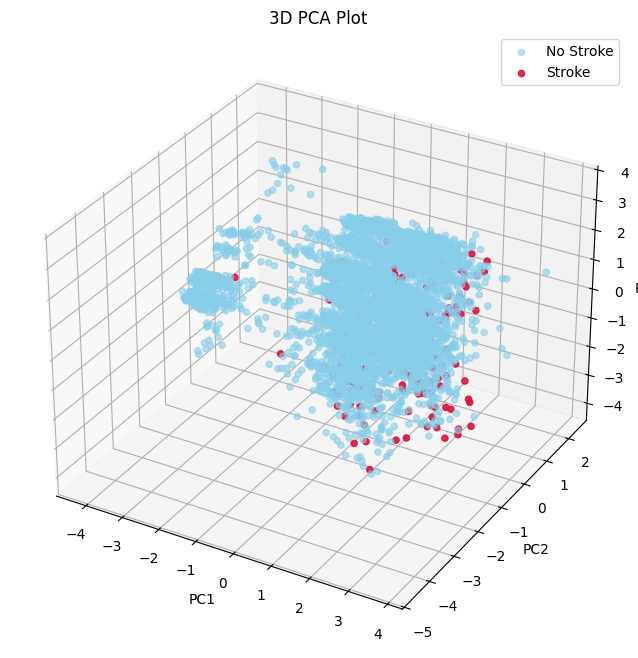

In [19]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3d[y == 0, 0], X_pca_3d[y == 0, 1], X_pca_3d[y == 0, 2], label='No Stroke', alpha=0.6, c='skyblue')
ax.scatter(X_pca_3d[y == 1, 0], X_pca_3d[y == 1, 1], X_pca_3d[y == 1, 2], label='Stroke', alpha=0.9, c='crimson')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot')
ax.legend()
plt.show()

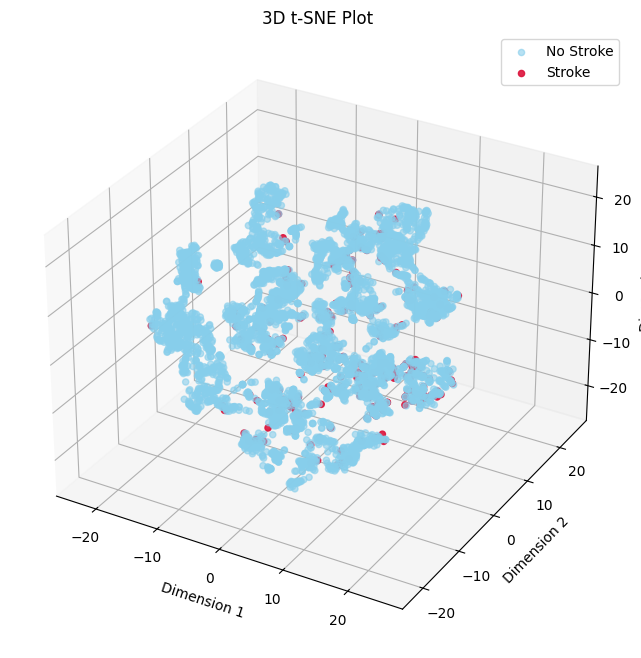

In [20]:
# t-SNE with 3 components
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each class
ax.scatter(X_tsne_3d[y == 0, 0], X_tsne_3d[y == 0, 1], X_tsne_3d[y == 0, 2], label='No Stroke', alpha=0.6, c='skyblue')
ax.scatter(X_tsne_3d[y == 1, 0], X_tsne_3d[y == 1, 1], X_tsne_3d[y == 1, 2], label='Stroke', alpha=0.9, c='crimson')

# Set labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D t-SNE Plot')
ax.legend()

# Display the plot
plt.show()

In [21]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca['Stroke'] = y  # assuming y is a 1D array or Series

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                    color=df_pca['Stroke'].map({0: 'No Stroke', 1: 'Stroke'}),
                    title='3D PCA Plot',
                    labels={'color': 'Stroke'},
                    opacity=0.7)

fig.update_traces(marker=dict(size=5))
fig.show()

In [22]:
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne_3d, columns=['Dim1', 'Dim2', 'Dim3'])
df_tsne['Stroke'] = y  # assuming y is a 1D array or Series

# Create interactive 3D scatter plot
fig = px.scatter_3d(df_tsne, x='Dim1', y='Dim2', z='Dim3',
                    color=df_tsne['Stroke'].map({0: 'No Stroke', 1: 'Stroke'}),
                    title='3D t-SNE Plot',
                    labels={'color': 'Stroke'},
                    opacity=0.7)

fig.update_traces(marker=dict(size=5))
fig.show()

In [23]:
df=df.drop('id',axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [24]:
df = df[df['gender'] != 'Other']

##Data splitting


In [25]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# First split: train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Second split: validation (15%) and test (15%) from temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print shapes to verify
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (3576, 10), (3576,)
Validation set shape: (766, 10), (766,)
Test set shape: (767, 10), (767,)


## 2. Data Cleaning and Preprocessing

We handle missing values, encode categorical variables, detect outliers, and split data into training, validation, and test sets.


In [26]:
df.replace('N/A', np.nan, inplace=True)

In [27]:
# Loop to show unique values per column
for col in df.columns:
    print(f"\033[1mColumn:\033[0m {col}")
    print(f"  → Unique values count: {df[col].nunique()}")

    unique_vals = df[col].unique()
    if len(unique_vals) <= 10:
        print(f"  → Unique values: {unique_vals}")
    else:
        print(f"  → Sample unique values: {unique_vals[:10]} ... [and {len(unique_vals) - 10} more]")

    print('-'*70)

Column: gender
  → Unique values count: 2
  → Unique values: ['Male' 'Female']
----------------------------------------------------------------------
Column: age
  → Unique values count: 104
  → Sample unique values: [67. 61. 80. 49. 79. 81. 74. 69. 59. 78.] ... [and 94 more]
----------------------------------------------------------------------
Column: hypertension
  → Unique values count: 2
  → Unique values: [0 1]
----------------------------------------------------------------------
Column: heart_disease
  → Unique values count: 2
  → Unique values: [1 0]
----------------------------------------------------------------------
Column: ever_married
  → Unique values count: 2
  → Unique values: ['Yes' 'No']
----------------------------------------------------------------------
Column: work_type
  → Unique values count: 5
  → Unique values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
----------------------------------------------------------------------
Column: Resi

##Encoding categorical features




In [28]:
# --- 1. Impute missing values in binary columns ---
binary_cols = ['ever_married', 'Residence_type', 'gender']


# --- 2. Label encode binary categorical columns ---
# gender: assign 1 to 'Female', 0 to 'Male' (weighted)
gender_map = {'Female': 1, 'Male': 0}
X_train['gender'] = X_train['gender'].map(gender_map)
X_val['gender'] = X_val['gender'].map(gender_map)
X_test['gender'] = X_test['gender'].map(gender_map)

# ever_married and Residence_type using LabelEncoder
le_ever_married = LabelEncoder()
le_residence = LabelEncoder()

X_train['ever_married'] = le_ever_married.fit_transform(X_train['ever_married'])
X_val['ever_married'] = le_ever_married.transform(X_val['ever_married'])
X_test['ever_married'] = le_ever_married.transform(X_test['ever_married'])

X_train['Residence_type'] = le_residence.fit_transform(X_train['Residence_type'])
X_val['Residence_type'] = le_residence.transform(X_val['Residence_type'])
X_test['Residence_type'] = le_residence.transform(X_test['Residence_type'])

# --- 3. One-hot encode 'work_type' and 'smoking_status' ---
one_hot_cols = ['work_type', 'smoking_status']

X_train = pd.get_dummies(X_train, columns=one_hot_cols, drop_first=False)
X_val = pd.get_dummies(X_val, columns=one_hot_cols, drop_first=False)
X_test = pd.get_dummies(X_test, columns=one_hot_cols, drop_first=False)

# --- 4. Align validation and test sets to training columns ---
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# X_train, X_val, X_test are now fully preprocessed and ready for modeling


## Filling missing values
Alternative ways to fill the missing values using the mean/knn and random forest variable names of the dataframes:-

df_mean <br>
df_rf <br>
df_knn

In [29]:
# --- Mean Imputation ---
df_mean = X_train.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_mean['bmi'] = mean_imputer.fit_transform(df_mean[['bmi']])

# --- Random Forest Imputation ---
# Copy of encoded dataframe
df_rf =X_train.copy()

# Separate features and target (bmi)
X = df_rf.drop(columns=['bmi'])
y = df_rf['bmi']

# Split into missing and non-missing
X_missing = X[y.isna()]
X_non_missing = X[y.notna()]
y_non_missing = y[y.notna()]

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_non_missing, y_non_missing)

# Predict missing BMI
y_pred = rf.predict(X_missing)

# Fill in predicted values
df_rf.loc[y.isna(), 'bmi'] = y_pred


# --- KNN Imputation ---
df_knn = X_train.copy()
knn = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn.fit_transform(df_knn), columns=df_knn.columns)

# --- Display Results ---
# Display the first 10 rows of each DataFrame for comparison

print("Mean Imputation Results (first 10 rows):")
display(df_mean[['bmi']].head(10))

print("\nRandom Forest Imputation Results (first 10 rows):")
display(df_rf[['bmi']].head(10))

print("\nKNN Imputation Results (first 10 rows):")
display(df_knn[['bmi']].head(10))

# --- Compare Missing Values After Imputation ---

# Check number of missing values after filling for each method
missing_values_mean = df_mean.isna().sum()
missing_values_rf = df_rf.isna().sum()
missing_values_knn = df_knn.isna().sum()

print("\nMissing Values After Imputation (Mean):")
print(missing_values_mean)

print("\nMissing Values After Imputation (Random Forest):")
print(missing_values_rf)

print("\nMissing Values After Imputation (KNN):")
print(missing_values_knn)

Mean Imputation Results (first 10 rows):


,bmi
4876,23.800000
4258,29.300000
3137,25.400000
4153,23.600000
3176,28.794469
601,30.900000
3954,20.100000
853,36.600000
2257,27.400000
3364,30.500000



Random Forest Imputation Results (first 10 rows):


,bmi
4876,23.800
4258,29.300
3137,25.400
4153,23.600
3176,28.977
601,30.900
3954,20.100
853,36.600
2257,27.400
3364,30.500



KNN Imputation Results (first 10 rows):


,bmi
0,23.8
1,29.3
2,25.4
3,23.6
4,26.4
5,30.9
6,20.1
7,36.6
8,27.4
9,30.5



Missing Values After Imputation (Mean):
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

Missing Values After Imputation (Random Forest):
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                             

In [30]:
# Make a copy of the validation set
df_val_rf = X_val.copy()

# Identify rows where 'bmi' is missing
val_missing_mask = df_val_rf['bmi'].isna()

# Prepare features (drop 'bmi')
X_val_features = df_val_rf.drop(columns=['bmi'])

# Select only the rows where bmi is missing
X_val_missing = X_val_features[val_missing_mask]

# Predict missing BMI values using the Random Forest trained on training data
bmi_val_pred = rf.predict(X_val_missing)

# Fill in the predicted BMI values
df_val_rf.loc[val_missing_mask, 'bmi'] = bmi_val_pred


In [31]:
# Make a copy of the test set
df_test_rf = X_test.copy()

# Identify missing BMI entries
test_missing_mask = df_test_rf['bmi'].isna()

# Prepare test features (drop 'bmi')
X_test_features = df_test_rf.drop(columns=['bmi'])

# Select only the rows where bmi is missing
X_test_missing = X_test_features[test_missing_mask]

# Predict missing BMI values using the RF model trained on training data
bmi_test_pred = rf.predict(X_test_missing)

# Fill in predicted BMI values
df_test_rf.loc[test_missing_mask, 'bmi'] = bmi_test_pred


## Detecting Outliers  (Start of df_rf pipeline)

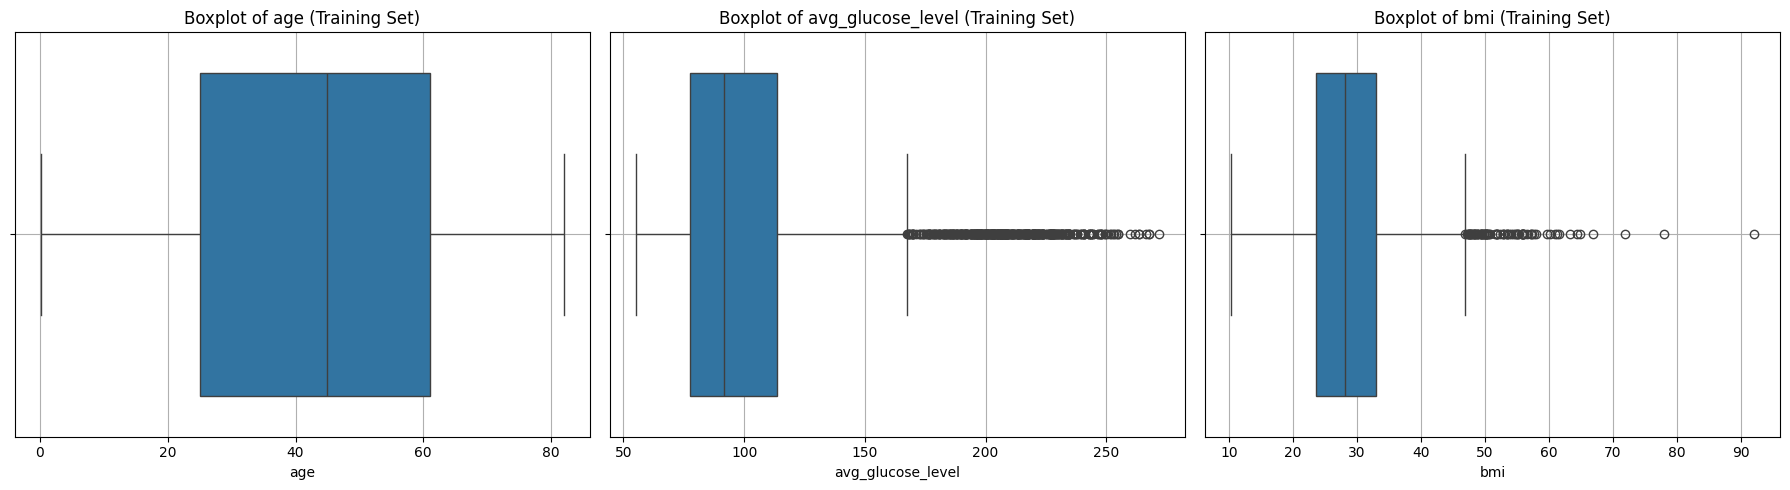

In [32]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_rf, x=col, ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {col} (Training Set)')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### IQR

In [33]:
df_rf_no_outliers = df_rf.copy()
for col in numerical_cols:
    Q1 = df_rf_no_outliers[col].quantile(0.25)
    Q3 = df_rf_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_rf_no_outliers[(df_rf_no_outliers[col] < lower_bound) | (df_rf_no_outliers[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")
    outlier_percentage = (len(outliers) / len(df_rf)) * 100  # Fixed here
    print(f"{col}: {outlier_percentage:.2f}% outliers")

Number of outliers in age: 0
age: 0.00% outliers
Number of outliers in avg_glucose_level: 423
avg_glucose_level: 11.83% outliers
Number of outliers in bmi: 85
bmi: 2.38% outliers


Statistical Test to check the normality of data

Shapiro-Wilk Normality Test Results:

Column: bmi
  Test Statistic = 0.9536
  p-value = 0.0000
  => The bmi data is likely NOT normally distributed.

Column: age
  Test Statistic = 0.9672
  p-value = 0.0000
  => The age data is likely NOT normally distributed.

Column: avg_glucose_level
  Test Statistic = 0.8057
  p-value = 0.0000
  => The avg_glucose_level data is likely NOT normally distributed.



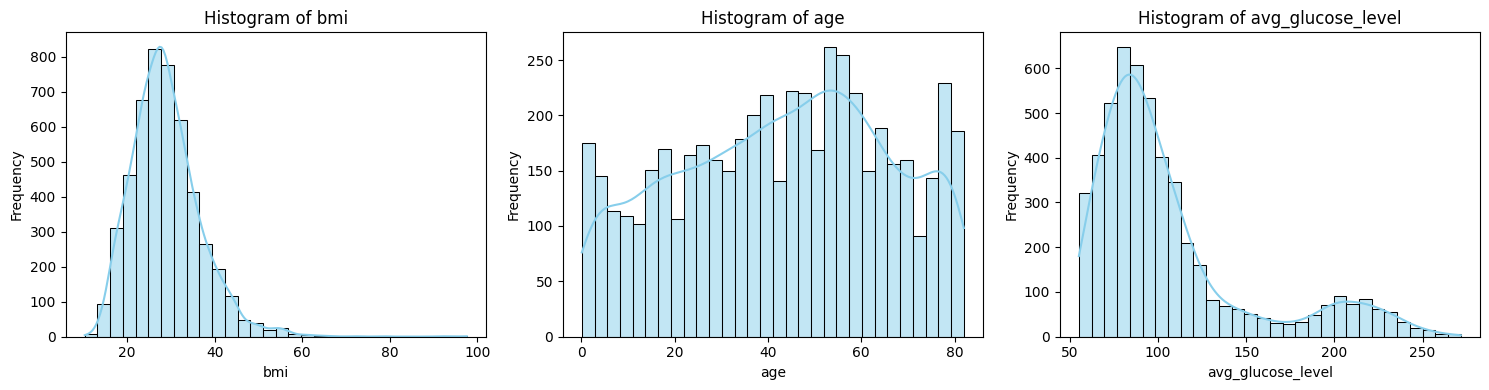

In [34]:
# List of columns to test
columns_to_test = ['bmi', 'age', 'avg_glucose_level']

print("Shapiro-Wilk Normality Test Results:\n")

for col in columns_to_test:
    # Drop missing values
    data = df[col].dropna()

    # Apply Shapiro-Wilk test
    stat, p_value = shapiro(data)

    # Print results
    print(f"Column: {col}")
    print(f"  Test Statistic = {stat:.4f}")
    print(f"  p-value = {p_value:.4f}")

    if p_value > 0.05:
        print(f"  => The {col} data is likely normally distributed.\n")
    else:
        print(f"  => The {col} data is likely NOT normally distributed.\n")


columns_to_plot = ['bmi', 'age', 'avg_glucose_level']

plt.figure(figsize=(15, 4))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


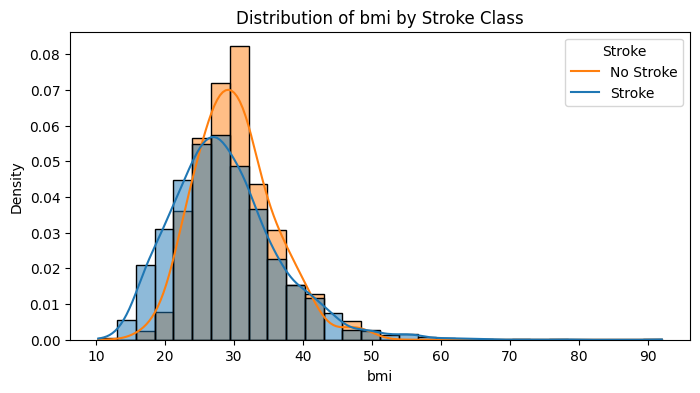

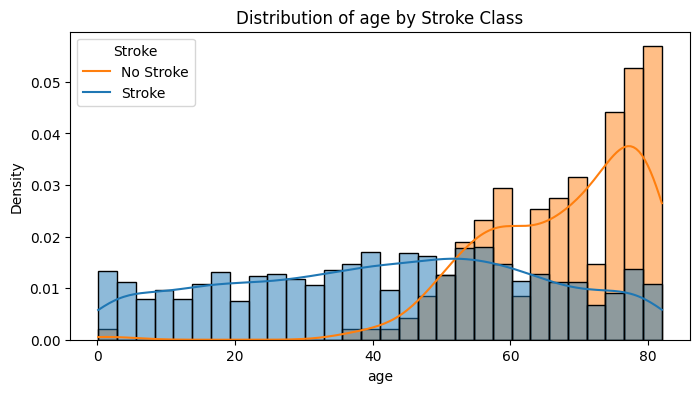

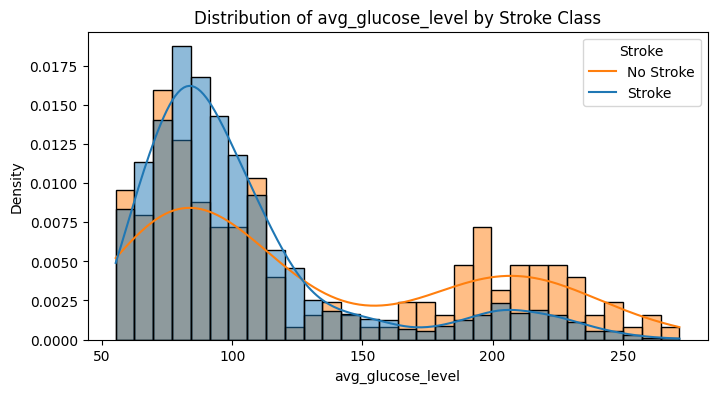

In [35]:
# If your features are in X_train (DataFrame) and your labels in y_train (Series):
df_plot = X_train.copy()
df_plot['stroke'] = y_train.values  # Make sure this aligns!

numerical_cols = ['bmi', 'age', 'avg_glucose_level']  # Update with your actual numerical columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_plot, x=col, hue='stroke', kde=True, stat="density", common_norm=False, bins=30)
    plt.title(f'Distribution of {col} by Stroke Class')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()


## Handeling Outliers

In [36]:
print(df_rf.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


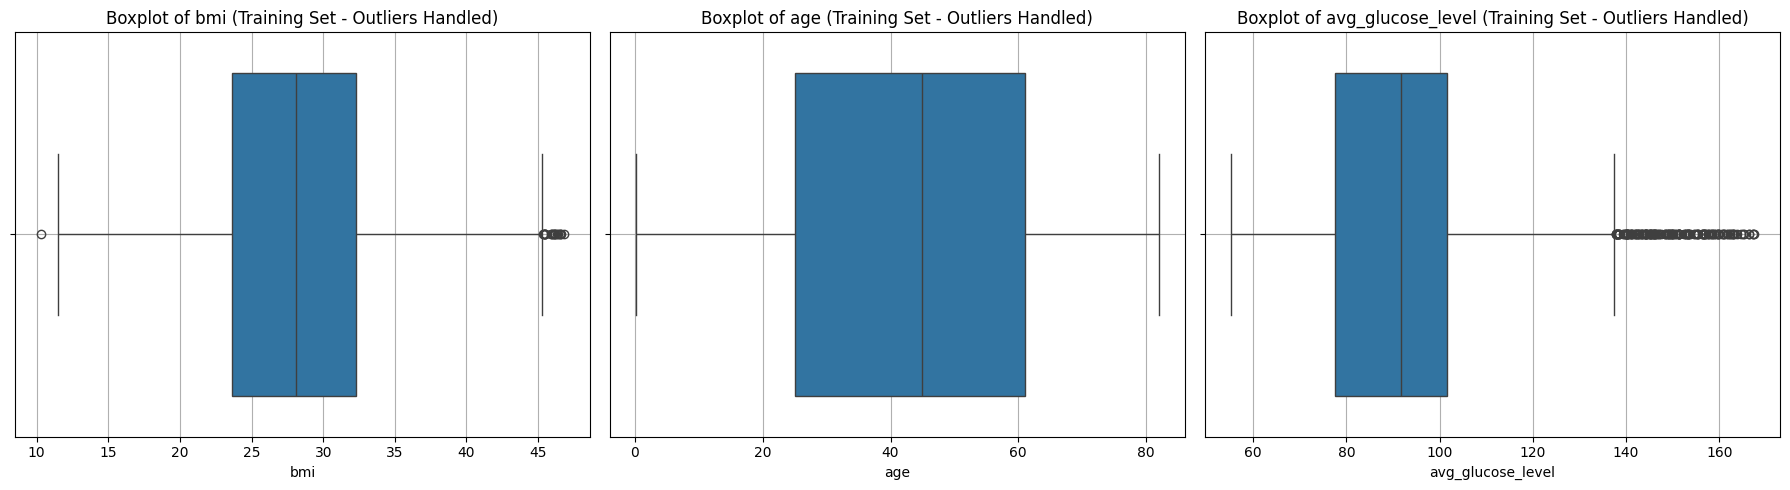

In [37]:
df_rf_no_outliers = df_rf.copy()
for col in numerical_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = df_rf_no_outliers[col].quantile(0.25)
    Q3 = df_rf_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_rf_no_outliers[(df_rf_no_outliers[col] < lower_bound) | (df_rf_no_outliers[col] > upper_bound)]

    # Impute outliers with the median (or mean if preferred)
    median_value = df_rf_no_outliers[col].median()
    df_rf_no_outliers.loc[outliers.index, col] = median_value

# Verify outlier removal
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_rf_no_outliers, x=col, ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {col} (Training Set - Outliers Handled)')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Continue with your model training and evaluation using df_rf_no_outliers.

In [38]:
missing_counts = df_rf_no_outliers.isnull().sum()
missing_percent = (missing_counts / len(df_rf_no_outliers)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent
})

print(missing_summary)

                                Missing Count  Missing Percentage
gender                                      0                 0.0
age                                         0                 0.0
hypertension                                0                 0.0
heart_disease                               0                 0.0
ever_married                                0                 0.0
Residence_type                              0                 0.0
avg_glucose_level                           0                 0.0
bmi                                         0                 0.0
work_type_Govt_job                          0                 0.0
work_type_Never_worked                      0                 0.0
work_type_Private                           0                 0.0
work_type_Self-employed                     0                 0.0
work_type_children                          0                 0.0
smoking_status_Unknown                      0                 0.0
smoking_st

In [39]:
df_rf_no_outliers.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4876,1,47.0,0,0,1,1,99.36,23.800,False,False,True,False,False,False,False,False,True
4258,1,45.0,0,0,1,1,82.94,29.300,False,False,False,True,False,True,False,False,False
3137,0,10.0,0,0,0,1,70.70,25.400,False,False,False,False,True,True,False,False,False
4153,0,79.0,1,0,1,1,72.04,23.600,False,False,False,True,False,False,True,False,False
3176,0,39.0,0,0,1,0,84.18,28.977,False,False,True,False,False,False,False,False,True


## Scaling numerical features

###Standard Scalar

In [40]:
# Numerical columns to scale
num_cols = ['bmi', 'age', 'avg_glucose_level']

# Make copies to avoid modifying original imputed data
X_train_scaled = df_rf_no_outliers.copy()
X_val_scaled = df_val_rf.copy()
X_test_scaled = df_test_rf.copy()

# Save a copy before scaling (training data)
X_train_before_scaling = X_train_scaled[num_cols].copy()

# Initialize the scaler
scaler = StandardScaler().fit(X_train_scaled[num_cols])

# Fit scaler on training data and transform training data
X_train_scaled[num_cols] = scaler.transform(X_train_scaled[num_cols])
X_val_scaled[num_cols] = scaler.transform(X_val_scaled[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_scaled[num_cols])

# Display before and after scaling for training data
print("Before scaling (training data):")
display(X_train_before_scaling.head())

print("After scaling (training data):")
display(X_train_scaled[num_cols].head())

Before scaling (training data):


,bmi,age,avg_glucose_level
4876,23.800,47.0,99.36
4258,29.300,45.0,82.94
3137,25.400,10.0,70.70
4153,23.600,79.0,72.04
3176,28.977,39.0,84.18


After scaling (training data):


,bmi,age,avg_glucose_level
4876,-0.672152,0.165303,0.376775
4258,0.156113,0.077127,-0.404535
3137,-0.431202,-1.465950,-0.986948
4153,-0.702271,1.576116,-0.923187
3176,0.107471,-0.187400,-0.345532


## Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

In [41]:
# Count the occurrences of each class in the training target 'stroke'
class_counts = y_train.value_counts()

# Print the count of each class
print(f"Class counts in training set:\n{class_counts}")

# Identify the minority and majority classes in training set
minority_class = class_counts.idxmin()  # Class with the minimum count
majority_class = class_counts.idxmax()  # Class with the maximum count

print(f"The minority class in training set is: {minority_class}")
print(f"The majority class in training set is: {majority_class}")


Class counts in training set:
stroke
0    3402
1     174
Name: count, dtype: int64
The minority class in training set is: 1
The majority class in training set is: 0


In [42]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Initialize SMOTE
smote = SMOTE(random_state=42)

# Step 2: Apply SMOTE only on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 3: Print class distribution before SMOTE (training data)
print("Before SMOTE (Training Data):")
print(y_train.value_counts())

print("************")

# Print sizes of splits
print(f"Training size: {len(y_train)}")
print(f"Validation size: {len(y_val)}")
print(f"Test size: {len(y_test)}")

print("************")

# Step 4: Print class distribution after SMOTE (training data)
print("Class distribution after SMOTE (Training Data):")
print(pd.Series(y_train_resampled).value_counts())

# Now use X_train_resampled, y_train_resampled for training your model


Before SMOTE (Training Data):
stroke
0    3402
1     174
Name: count, dtype: int64
************
Training size: 3576
Validation size: 766
Test size: 767
************
Class distribution after SMOTE (Training Data):
stroke
0    3402
1    3402
Name: count, dtype: int64


#Using penality

In [43]:
class_weight = {0: 1, 1: 30}  # Increase stroke class weight to 30 to emphasize severity

#experiment with values like 20, 30, 50 and choose what works best based on validation metrics (especially recall or F1-score for stroke).

Tune class weight

In [44]:
param_grid = {
    'class_weight': [{0: 1, 1: w} for w in [1, 5, 10, 15, 20, 25, 30]],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, scoring='recall', cv=5)
grid.fit(X_train_scaled, y_train)
print("Best params:", grid.best_params_)


Best params: {'class_weight': {0: 1, 1: 30}, 'max_depth': 3, 'min_samples_split': 2}


##  3. Training Classifiers

We train several classifiers and tune their hyperparameters using GridSearchCV and Optuna for improved performance.


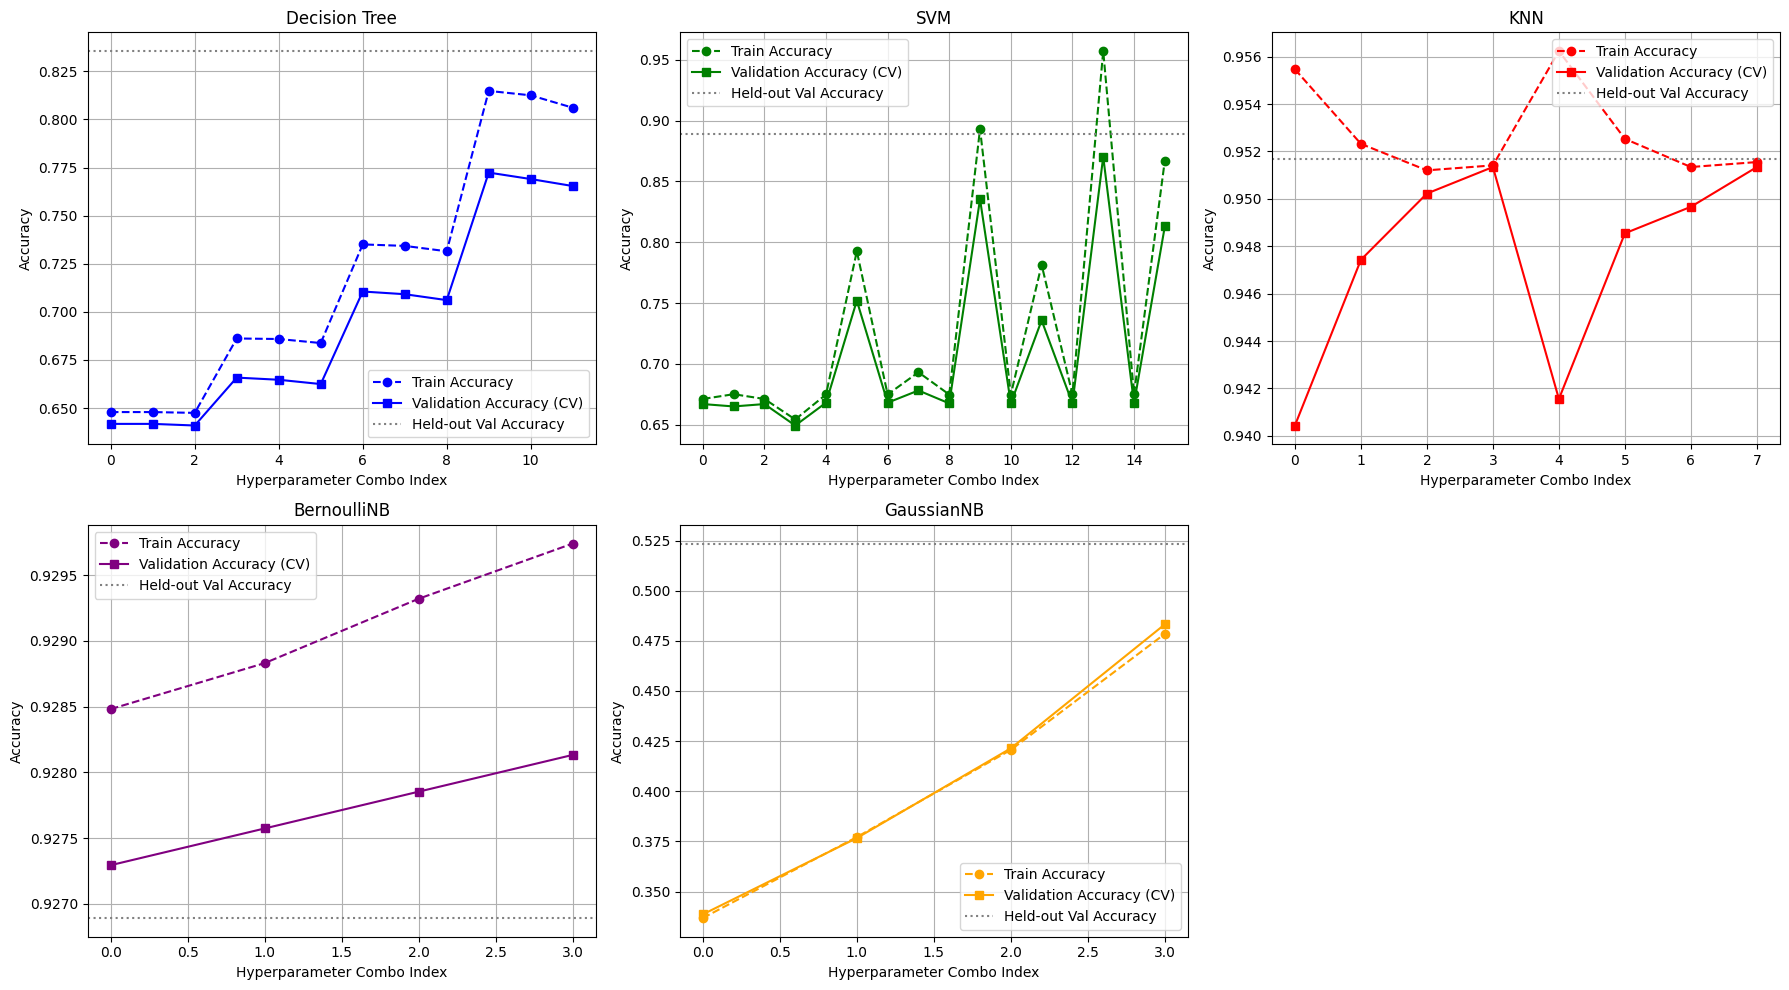

=== Final Accuracy Scores on Best Models ===

Decision Tree:
  → Best Params:         {'max_depth': 10, 'min_samples_split': 2}
  → Training Accuracy:   0.8345
  → Validation Accuracy: 0.8355

SVM:
  → Best Params:         {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
  → Training Accuracy:   0.9449
  → Validation Accuracy: 0.8890

KNN:
  → Best Params:         {'metric': 'euclidean', 'n_neighbors': 10}
  → Training Accuracy:   0.9513
  → Validation Accuracy: 0.9517

BernoulliNB:
  → Best Params:         {'alpha': 2.0}
  → Training Accuracy:   0.9306
  → Validation Accuracy: 0.9269

GaussianNB:
  → Best Params:         {'var_smoothing': 1e-06}
  → Training Accuracy:   0.5006
  → Validation Accuracy: 0.5235



In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# Define class weights
class_weight = {0: 1, 1: 25}

# Hyperparameter grids
params_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
params_svm = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
params_knn = {'n_neighbors': [3, 5, 7, 10], 'metric': ['euclidean', 'manhattan']}
params_bern = {'alpha': [0.1, 0.5, 1.0, 2.0]}
params_gauss = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# Grid searches with accuracy scoring
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight=class_weight), params_dt,
                       cv=5, scoring='accuracy', return_train_score=True)
grid_dt.fit(X_train_scaled, y_train)

grid_svm = GridSearchCV(SVC(probability=True, class_weight=class_weight, random_state=42), params_svm,
                        cv=5, scoring='accuracy', return_train_score=True)
grid_svm.fit(X_train_scaled, y_train)

grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn,
                        cv=5, scoring='accuracy', return_train_score=True)
grid_knn.fit(X_train_scaled, y_train)

grid_bern = GridSearchCV(BernoulliNB(), params_bern,
                         cv=5, scoring='accuracy', return_train_score=True)
grid_bern.fit(X_train_scaled, y_train)

grid_gauss = GridSearchCV(GaussianNB(), params_gauss,
                          cv=5, scoring='accuracy', return_train_score=True)
grid_gauss.fit(X_train_scaled, y_train)

# Plot training and validation accuracy
plt.figure(figsize=(18, 10))

def plot_train_val(ax, grid, title, color):
    train_scores = grid.cv_results_['mean_train_score']
    val_scores = grid.cv_results_['mean_test_score']
    ax.plot(train_scores, label='Train Accuracy', marker='o', linestyle='--', color=color)
    ax.plot(val_scores, label='Validation Accuracy (CV)', marker='s', linestyle='-', color=color)
    best_val_acc = accuracy_score(y_val, grid.best_estimator_.predict(X_val_scaled))
    ax.axhline(best_val_acc, linestyle=':', color='gray', label='Held-out Val Accuracy')
    ax.set_title(title)
    ax.set_xlabel('Hyperparameter Combo Index')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)

plot_train_val(plt.subplot(2, 3, 1), grid_dt, 'Decision Tree', 'blue')
plot_train_val(plt.subplot(2, 3, 2), grid_svm, 'SVM', 'green')
plot_train_val(plt.subplot(2, 3, 3), grid_knn, 'KNN', 'red')
plot_train_val(plt.subplot(2, 3, 4), grid_bern, 'BernoulliNB', 'purple')
plot_train_val(plt.subplot(2, 3, 5), grid_gauss, 'GaussianNB', 'orange')

plt.tight_layout()
plt.show()

# Print final training & held-out validation accuracy
print("=== Final Accuracy Scores on Best Models ===\n")
for name, grid in [
    ('Decision Tree', grid_dt),
    ('SVM', grid_svm),
    ('KNN', grid_knn),
    ('BernoulliNB', grid_bern),
    ('GaussianNB', grid_gauss)
]:
    best_model = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_model.predict(X_train_scaled))
    val_acc = accuracy_score(y_val, best_model.predict(X_val_scaled))
    print(f"{name}:")
    print(f"  → Best Params:         {grid.best_params_}")
    print(f"  → Training Accuracy:   {train_acc:.4f}")
    print(f"  → Validation Accuracy: {val_acc:.4f}\n")


In [46]:
# Print final training & held-out validation accuracy
print("=== Final Accuracy Scores on Best Models ===\n")
for name, grid in [
    ('Decision Tree', grid_dt),
    ('SVM', grid_svm),
    ('KNN', grid_knn),
    ('BernoulliNB', grid_bern),
    ('GaussianNB', grid_gauss)
]:
    best_model = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_model.predict(X_train_scaled))
    val_acc = accuracy_score(y_val, best_model.predict(X_val_scaled))
    print(f"{name}:")
    print(f"  → Best Params:         {grid.best_params_}")
    print(f"  → Training Accuracy:   {train_acc:.4f}")
    print(f"  → Validation Accuracy: {val_acc:.4f}\n")


=== Final Accuracy Scores on Best Models ===

Decision Tree:
  → Best Params:         {'max_depth': 10, 'min_samples_split': 2}
  → Training Accuracy:   0.8345
  → Validation Accuracy: 0.8355

SVM:
  → Best Params:         {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
  → Training Accuracy:   0.9449
  → Validation Accuracy: 0.8890

KNN:
  → Best Params:         {'metric': 'euclidean', 'n_neighbors': 10}
  → Training Accuracy:   0.9513
  → Validation Accuracy: 0.9517

BernoulliNB:
  → Best Params:         {'alpha': 2.0}
  → Training Accuracy:   0.9306
  → Validation Accuracy: 0.9269

GaussianNB:
  → Best Params:         {'var_smoothing': 1e-06}
  → Training Accuracy:   0.5006
  → Validation Accuracy: 0.5235



Recall-Focused Hyperparameter Optimization and Model Evaluation with Grid search

Best Decision Tree params: {'max_depth': 3, 'min_samples_split': 2}
Best SVM params: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Best KNN params: {'metric': 'euclidean', 'n_neighbors': 3}
Best BernoulliNB params: {'alpha': 0.1}
Best GaussianNB params: {'var_smoothing': 1e-09}


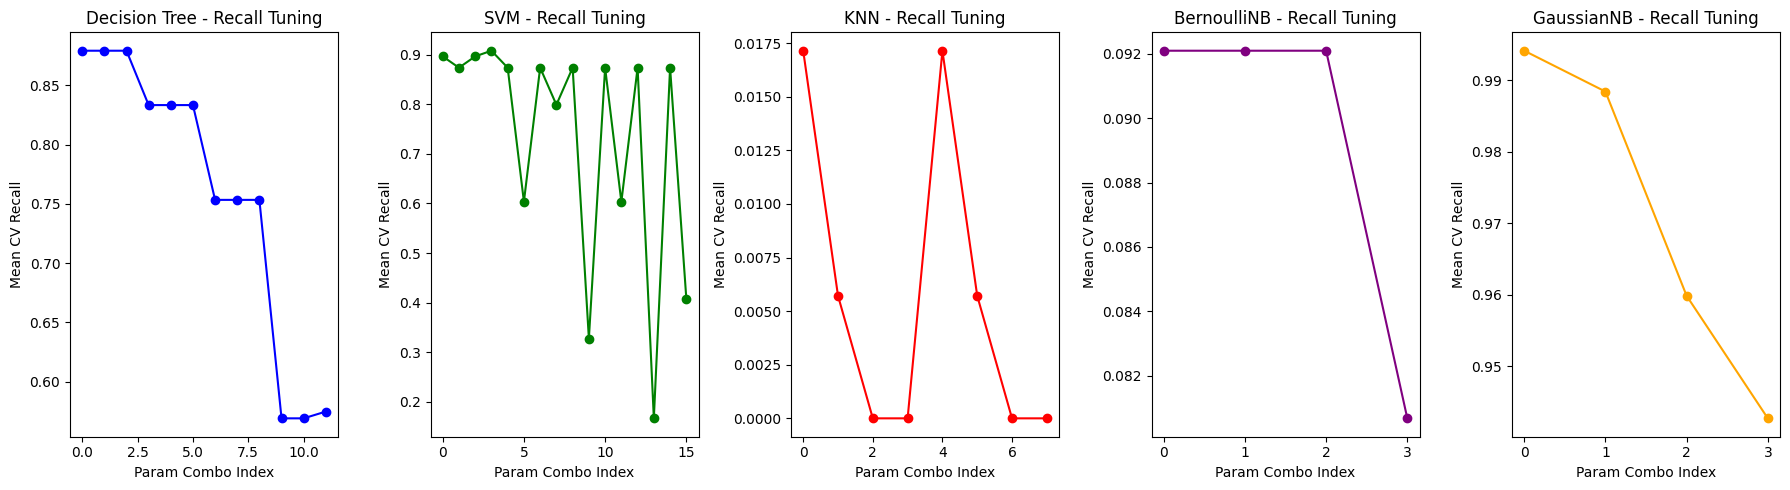


Decision Tree Validation Metrics:
              precision    recall  f1-score   support

   No Stroke       0.99      0.64      0.78       729
      Stroke       0.11      0.84      0.19        37

    accuracy                           0.65       766
   macro avg       0.55      0.74      0.48       766
weighted avg       0.94      0.65      0.75       766


SVM Validation Metrics:
              precision    recall  f1-score   support

   No Stroke       0.99      0.62      0.76       729
      Stroke       0.11      0.89      0.19        37

    accuracy                           0.63       766
   macro avg       0.55      0.75      0.47       766
weighted avg       0.95      0.63      0.73       766


KNN Validation Metrics:
              precision    recall  f1-score   support

   No Stroke       0.95      0.98      0.97       729
      Stroke       0.12      0.05      0.07        37

    accuracy                           0.93       766
   macro avg       0.54      0.52      0.52

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import recall_score, make_scorer, classification_report

# Define class weights (custom dictionary example)
class_weight = {0: 1, 1: 25}  # Emphasize stroke class

# Define hyperparameter grids
params_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
params_svm = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
params_knn = {'n_neighbors': [3, 5, 7, 10], 'metric': ['euclidean', 'manhattan']}
params_bern = {'alpha': [0.1, 0.5, 1.0, 2.0]}
params_gauss = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# Custom scorer for recall (focus on stroke class)
recall_scorer = make_scorer(recall_score, pos_label=1)

# Grid Search for Decision Tree
dt = DecisionTreeClassifier(random_state=42, class_weight=class_weight)
grid_dt = GridSearchCV(dt, params_dt, cv=5, scoring=recall_scorer)
grid_dt.fit(X_train_scaled, y_train)
print("Best Decision Tree params:", grid_dt.best_params_)

# Grid Search for SVM
svm = SVC(probability=True, class_weight=class_weight, random_state=42)
grid_svm = GridSearchCV(svm, params_svm, cv=5, scoring=recall_scorer)
grid_svm.fit(X_train_scaled, y_train)
print("Best SVM params:", grid_svm.best_params_)

# KNN (no class_weight)
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, params_knn, cv=5, scoring=recall_scorer)
grid_knn.fit(X_train_scaled, y_train)
print("Best KNN params:", grid_knn.best_params_)

# BernoulliNB (tune alpha)
bern = BernoulliNB()
grid_bern = GridSearchCV(bern, params_bern, cv=5, scoring=recall_scorer)
grid_bern.fit(X_train_scaled, y_train)
print("Best BernoulliNB params:", grid_bern.best_params_)

# GaussianNB (tune var_smoothing)
gauss = GaussianNB()
grid_gauss = GridSearchCV(gauss, params_gauss, cv=5, scoring=recall_scorer)
grid_gauss.fit(X_train_scaled, y_train)
print("Best GaussianNB params:", grid_gauss.best_params_)

# Plotting recall scores for each model
plt.figure(figsize=(18, 5))

plt.subplot(1, 5, 1)
scores_dt = grid_dt.cv_results_['mean_test_score']
plt.plot(range(len(scores_dt)), scores_dt, marker='o', color='blue')
plt.title('Decision Tree - Recall Tuning')
plt.xlabel('Param Combo Index')
plt.ylabel('Mean CV Recall')

plt.subplot(1, 5, 2)
scores_svm = grid_svm.cv_results_['mean_test_score']
plt.plot(range(len(scores_svm)), scores_svm, marker='o', color='green')
plt.title('SVM - Recall Tuning')
plt.xlabel('Param Combo Index')
plt.ylabel('Mean CV Recall')

plt.subplot(1, 5, 3)
scores_knn = grid_knn.cv_results_['mean_test_score']
plt.plot(range(len(scores_knn)), scores_knn, marker='o', color='red')
plt.title('KNN - Recall Tuning')
plt.xlabel('Param Combo Index')
plt.ylabel('Mean CV Recall')

plt.subplot(1, 5, 4)
scores_bern = grid_bern.cv_results_['mean_test_score']
plt.plot(range(len(scores_bern)), scores_bern, marker='o', color='purple')
plt.title('BernoulliNB - Recall Tuning')
plt.xlabel('Param Combo Index')
plt.ylabel('Mean CV Recall')

plt.subplot(1, 5, 5)
scores_gauss = grid_gauss.cv_results_['mean_test_score']
plt.plot(range(len(scores_gauss)), scores_gauss, marker='o', color='orange')
plt.title('GaussianNB - Recall Tuning')
plt.xlabel('Param Combo Index')
plt.ylabel('Mean CV Recall')

plt.tight_layout()
plt.show()

# Evaluate best models on validation set
models = {
    'Decision Tree': grid_dt.best_estimator_,
    'SVM': grid_svm.best_estimator_,
    'KNN': grid_knn.best_estimator_,
    'BernoulliNB': grid_bern.best_estimator_,
    'GaussianNB': grid_gauss.best_estimator_
}

for name, model in models.items():
    y_val_pred = model.predict(X_val_scaled)
    print(f"\n{name} Validation Metrics:")
    print(classification_report(y_val, y_val_pred, target_names=['No Stroke', 'Stroke']))


In [48]:
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB

models = {
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    "SVM": grid_svm.best_estimator_,
    "KNN": grid_knn.best_estimator_,
    "Decision Tree": grid_dt.best_estimator_
}

results = {}

for name, model in models.items():
    # Train on original scaled training data (no resampling)
    model.fit(X_train_scaled, y_train)

    # Predict on validation data
    y_val_pred = model.predict(X_val_scaled)

    # Calculate recall and F1-score for stroke class (label=1)
    recall = recall_score(y_val, y_val_pred, pos_label=1)
    f1 = f1_score(y_val, y_val_pred, pos_label=1)

    results[name] = {'Recall': recall, 'F1-score': f1}

    print(f"{name} Validation Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(classification_report(y_val, y_val_pred, target_names=['No Stroke', 'Stroke']))

Gaussian NB Validation Recall: 0.9730, F1-score: 0.1333
              precision    recall  f1-score   support

   No Stroke       1.00      0.36      0.53       729
      Stroke       0.07      0.97      0.13        37

    accuracy                           0.39       766
   macro avg       0.53      0.67      0.33       766
weighted avg       0.95      0.39      0.51       766

Bernoulli NB Validation Recall: 0.0541, F1-score: 0.0656
              precision    recall  f1-score   support

   No Stroke       0.95      0.97      0.96       729
      Stroke       0.08      0.05      0.07        37

    accuracy                           0.93       766
   macro avg       0.52      0.51      0.51       766
weighted avg       0.91      0.93      0.92       766

SVM Validation Recall: 0.8919, F1-score: 0.1891
              precision    recall  f1-score   support

   No Stroke       0.99      0.62      0.76       729
      Stroke       0.11      0.89      0.19        37

    accuracy         

In [49]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.2 MB/s eta 0:00:00


In [50]:
import optuna
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from functools import partial

def objective(trial, X_train, y_train, X_val, y_val):
    model_name = trial.suggest_categorical("model", ["KNN", "SVM", "DecisionTree", "GaussianNB", "BernoulliNB"])

    if model_name == "KNN":
        n_neighbors = trial.suggest_int('n_neighbors', 3, 15)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)

    elif model_name == "SVM":
        C = trial.suggest_loguniform('C', 1e-3, 1e2)
        gamma = trial.suggest_loguniform('gamma', 1e-4, 1e1)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
        model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True, random_state=42,
                    class_weight={0: 1, 1: 30})

    elif model_name == "DecisionTree":
        max_depth = trial.suggest_int('max_depth', 2, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                                       random_state=42, class_weight={0: 1, 1: 30})

    elif model_name == "GaussianNB":
        model = GaussianNB()

    elif model_name == "BernoulliNB":
        alpha = trial.suggest_float("alpha", 0.0, 1.0)
        model = BernoulliNB(alpha=alpha)

    else:
        raise ValueError("Invalid model type")

    # Train model on original scaled training data
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Return recall for stroke class (label=1) as optimization metric
    return recall_score(y_val, y_pred, pos_label=1)


# Create partial function with your original scaled data
objective_with_data = partial(objective,
                              X_train=X_train_scaled,
                              y_train=y_train,
                              X_val=X_val_scaled,
                              y_val=y_val)

# Create Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective_with_data, n_trials=30)

print("Best model and hyperparameters from Optuna:")
print(study.best_params)

[I 2025-05-10 19:44:38,648] A new study created in memory with name: no-name-5b63327d-f042-45f4-80c1-d24ba2b6812f
[I 2025-05-10 19:44:38,660] Trial 0 finished with value: 0.972972972972973 and parameters: {'model': 'GaussianNB'}. Best is trial 0 with value: 0.972972972972973.
[I 2025-05-10 19:44:44,469] Trial 1 finished with value: 1.0 and parameters: {'model': 'SVM', 'C': 2.782914975063492, 'gamma': 0.0031192558739787947, 'kernel': 'poly'}. Best is trial 1 with value: 1.0.
[I 2025-05-10 19:44:44,496] Trial 2 finished with value: 0.972972972972973 and parameters: {'model': 'GaussianNB'}. Best is trial 1 with value: 1.0.
[I 2025-05-10 19:44:44,524] Trial 3 finished with value: 0.05405405405405406 and parameters: {'model': 'BernoulliNB', 'alpha': 0.5237788331647822}. Best is trial 1 with value: 1.0.
[I 2025-05-10 19:44:54,415] Trial 4 finished with value: 0.02702702702702703 and parameters: {'model': 'SVM', 'C': 4.31844349673735, 'gamma': 3.484470588640637, 'kernel': 'rbf'}. Best is tria

Best model and hyperparameters from Optuna:
{'model': 'SVM', 'C': 2.782914975063492, 'gamma': 0.0031192558739787947, 'kernel': 'poly'}


##  4. Testing Classifiers

We evaluate classifiers using precision, recall, F1-score, and confusion matrix.


--- Gaussian NB ---
              precision    recall  f1-score   support

   No Stroke       1.00      0.31      0.48       729
      Stroke       0.07      0.97      0.13        38

    accuracy                           0.35       767
   macro avg       0.53      0.64      0.30       767
weighted avg       0.95      0.35      0.46       767

Accuracy: 0.3468


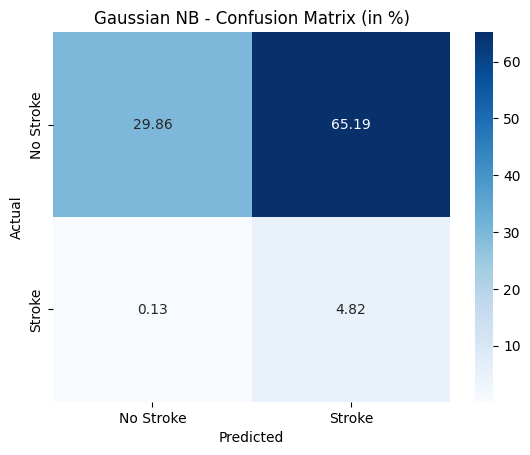

--- Bernoulli NB ---
              precision    recall  f1-score   support

   No Stroke       0.95      0.97      0.96       729
      Stroke       0.15      0.11      0.12        38

    accuracy                           0.93       767
   macro avg       0.55      0.54      0.54       767
weighted avg       0.91      0.93      0.92       767

Accuracy: 0.9257


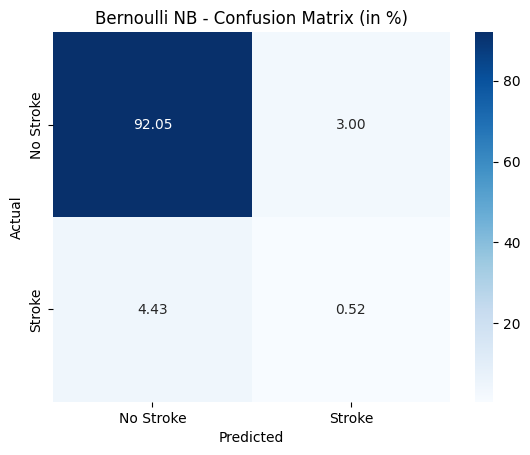

--- SVM ---
              precision    recall  f1-score   support

   No Stroke       0.99      0.61      0.76       729
      Stroke       0.10      0.84      0.18        38

    accuracy                           0.63       767
   macro avg       0.54      0.73      0.47       767
weighted avg       0.94      0.63      0.73       767

Accuracy: 0.6258


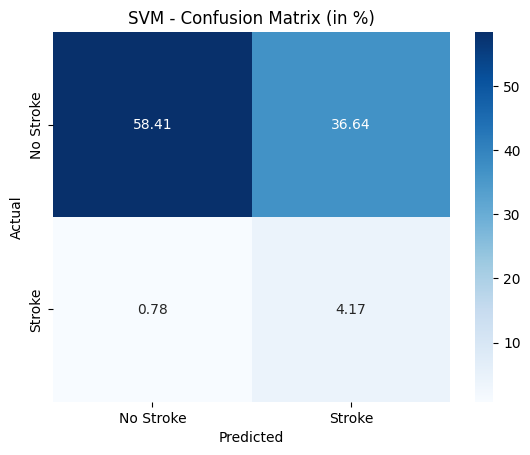

--- KNN ---
              precision    recall  f1-score   support

   No Stroke       0.95      0.98      0.97       729
      Stroke       0.15      0.05      0.08        38

    accuracy                           0.94       767
   macro avg       0.55      0.52      0.52       767
weighted avg       0.91      0.94      0.92       767

Accuracy: 0.9387


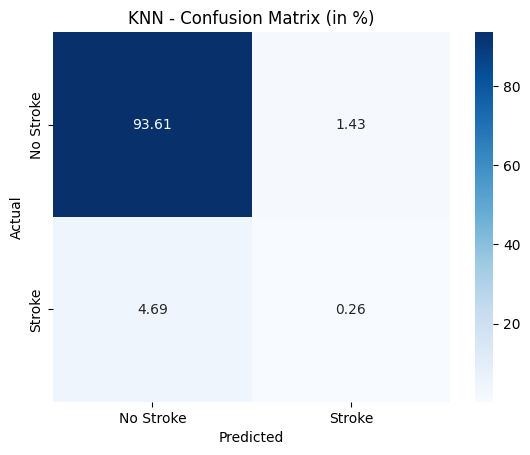

--- Decision Tree ---
              precision    recall  f1-score   support

   No Stroke       0.98      0.65      0.78       729
      Stroke       0.10      0.79      0.18        38

    accuracy                           0.65       767
   macro avg       0.54      0.72      0.48       767
weighted avg       0.94      0.65      0.75       767

Accuracy: 0.6545


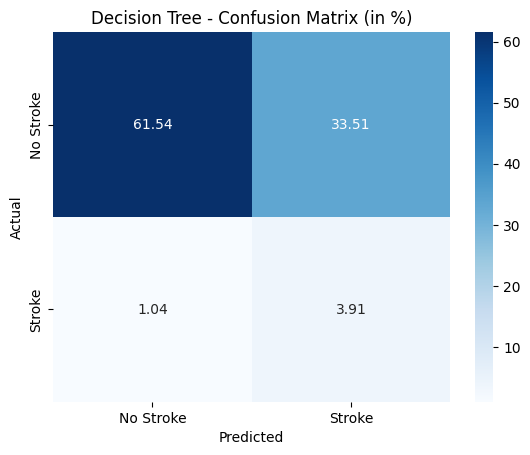

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    print(f"--- {name} ---")

    # Ensure model is trained if not already
    # model.fit(X_train_scaled, y_train)  # Uncomment if needed

    y_pred = model.predict(X_test_scaled)

    # Classification report with target names
    print(classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke']))

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Confusion matrix and normalize to percentages
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm / cm.sum() * 100  # convert to percentages

    # Display the confusion matrix with percentages
    sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.title(f"{name} - Confusion Matrix (in %)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Visualizing the results

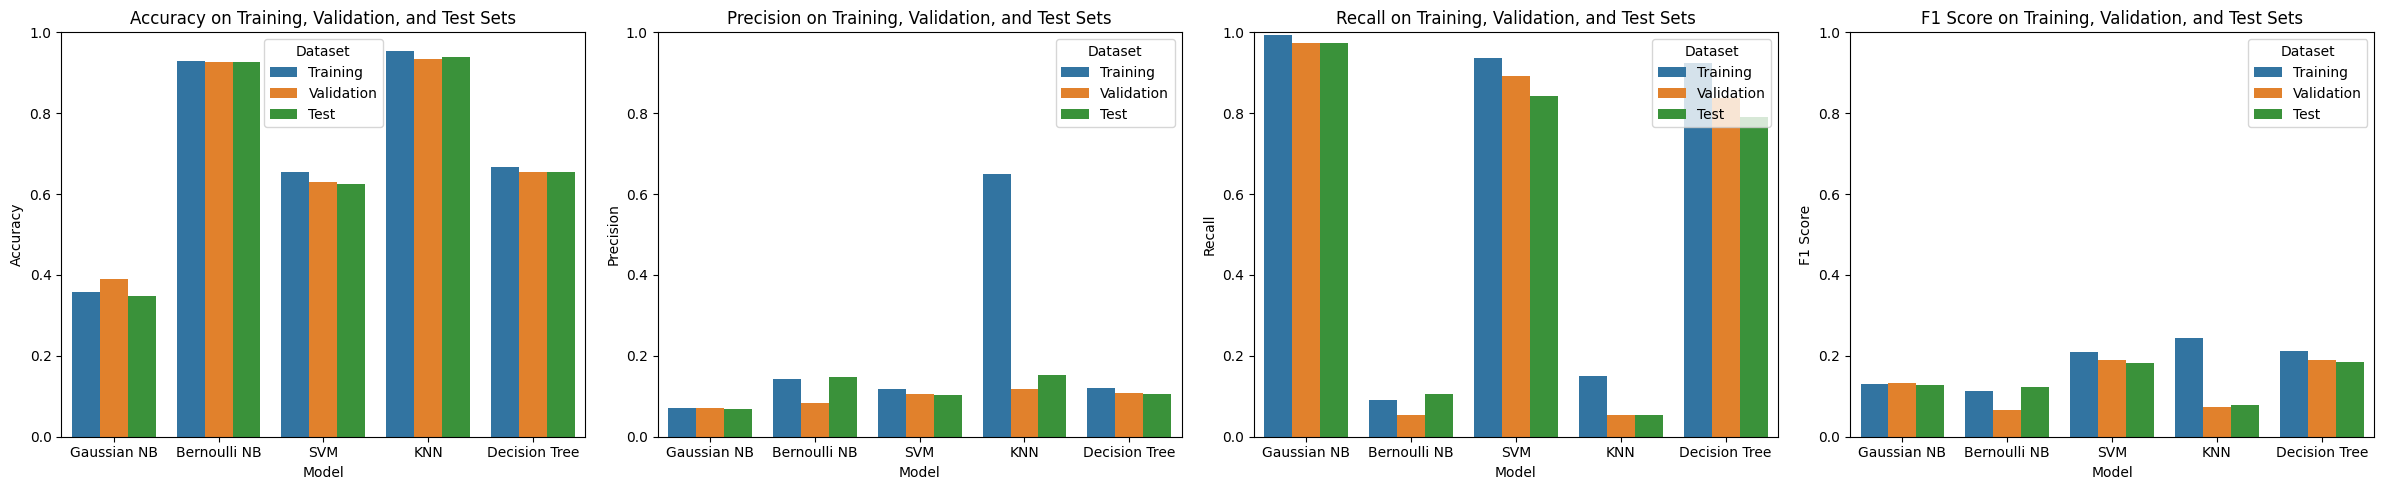

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = []

for name, model in models.items():
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)

    metrics.append({
        'Model': name,
        'Dataset': 'Training',
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, pos_label=1),
        'Recall': recall_score(y_train, y_train_pred, pos_label=1),
        'F1 Score': f1_score(y_train, y_train_pred, pos_label=1)
    })
    metrics.append({
        'Model': name,
        'Dataset': 'Validation',
        'Accuracy': accuracy_score(y_val, y_val_pred),
        'Precision': precision_score(y_val, y_val_pred, pos_label=1),
        'Recall': recall_score(y_val, y_val_pred, pos_label=1),
        'F1 Score': f1_score(y_val, y_val_pred, pos_label=1)
    })
    metrics.append({
        'Model': name,
        'Dataset': 'Test',
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, pos_label=1),
        'Recall': recall_score(y_test, y_test_pred, pos_label=1),
        'F1 Score': f1_score(y_test, y_test_pred, pos_label=1)
    })

df_metrics = pd.DataFrame(metrics)

# --- Plotting ---
plt.figure(figsize=(24, 5))  # wider figure to accommodate 4 plots

plt.subplot(1, 4, 1)
sns.barplot(data=df_metrics, x='Model', y='Accuracy', hue='Dataset')
plt.title('Accuracy on Training, Validation, and Test Sets')
plt.ylim(0, 1)
plt.ylabel('Accuracy')

plt.subplot(1, 4, 2)
sns.barplot(data=df_metrics, x='Model', y='Precision', hue='Dataset')
plt.title('Precision on Training, Validation, and Test Sets')
plt.ylim(0, 1)
plt.ylabel('Precision')

plt.subplot(1, 4, 3)
sns.barplot(data=df_metrics, x='Model', y='Recall', hue='Dataset')
plt.title('Recall on Training, Validation, and Test Sets')
plt.ylim(0, 1)
plt.ylabel('Recall')

plt.subplot(1, 4, 4)
sns.barplot(data=df_metrics, x='Model', y='F1 Score', hue='Dataset')
plt.title('F1 Score on Training, Validation, and Test Sets')
plt.ylim(0, 1)
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()


## 📊 5. Clustering Analysis

Using Hierarchical and K-Means clustering to find natural groups in the data and comparing them with classifier predictions.


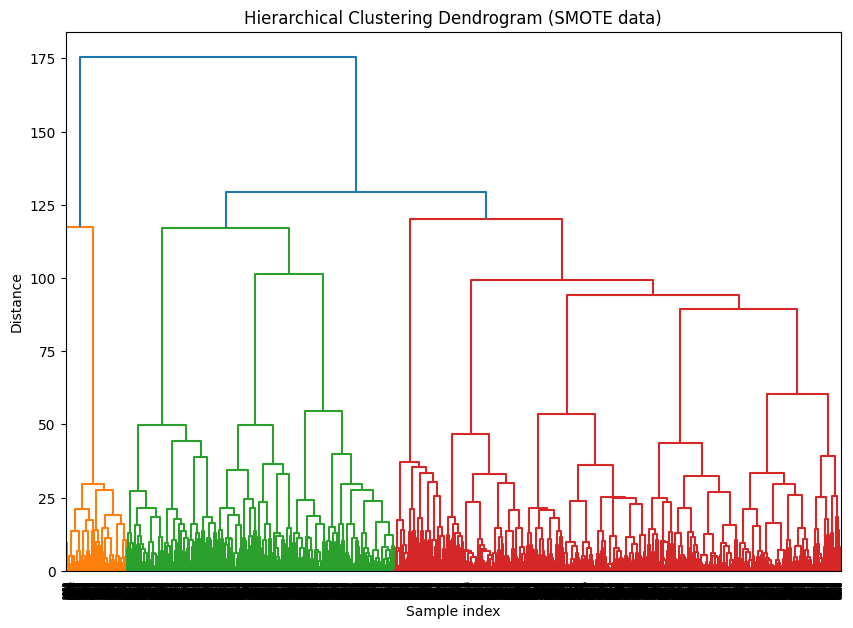

Stroke counts per cluster:
hierarchical_cluster  stroke
1                     0          510
                      1           24
2                     0         2892
                      1         3378
dtype: int64

Stroke percentages per cluster:
                      No Stroke (%)  Stroke (%)
hierarchical_cluster                           
1                         95.505618    4.494382
2                         46.124402   53.875598


In [53]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd

# Assume X_train_resampled, y_train_resampled are your SMOTE data

# 1. Scale SMOTE data features
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_train_resampled)

# 2. Hierarchical clustering on SMOTE data
Z = linkage(X_smote_scaled, method='ward')

# 3. Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (SMOTE data)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# 4. Assign clusters (2 clusters)
cluster_labels = fcluster(Z, t=2, criterion='maxclust')

# 5. Create DataFrame with cluster labels and stroke
df_smote_clusters = pd.DataFrame({
    'hierarchical_cluster': cluster_labels,
    'stroke': y_train_resampled.values
})

# 6. Stroke counts per cluster
stroke_counts = df_smote_clusters.groupby(['hierarchical_cluster', 'stroke']).size()
print("Stroke counts per cluster:")
print(stroke_counts)

# 7. Stroke percentages per cluster
stroke_percentages = df_smote_clusters.groupby('hierarchical_cluster')['stroke'].value_counts(normalize=True).unstack(fill_value=0) * 100
stroke_percentages.columns = ['No Stroke (%)', 'Stroke (%)']
print("\nStroke percentages per cluster:")
print(stroke_percentages)

In [54]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Fit K-Means clustering with 2 clusters on SMOTE-resampled training data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_resampled)

# Prepare DataFrame with cluster labels and stroke info
df_resampled = X_train_resampled.copy().reset_index(drop=True)
df_resampled['stroke'] = y_train_resampled.reset_index(drop=True)
df_resampled['kmeans_cluster'] = kmeans.labels_

# Stroke counts per cluster
stroke_distribution_kmeans = df_resampled.groupby(['kmeans_cluster', 'stroke']).size()
print("Stroke counts per cluster:")
print(stroke_distribution_kmeans)

# Stroke percentages per cluster
stroke_distribution_kmeans_percent = df_resampled.groupby('kmeans_cluster')['stroke'].value_counts(normalize=True).unstack(fill_value=0) * 100
stroke_distribution_kmeans_percent.columns = ['No Stroke (%)', 'Stroke (%)']
print("\nStroke percentages per cluster:")
print(stroke_distribution_kmeans_percent)

Stroke counts per cluster:
kmeans_cluster  stroke
0               0         1292
                1           28
1               0         2110
                1         3374
dtype: int64

Stroke percentages per cluster:
                No Stroke (%)  Stroke (%)
kmeans_cluster                           
0                   97.878788    2.121212
1                   38.475565   61.524435


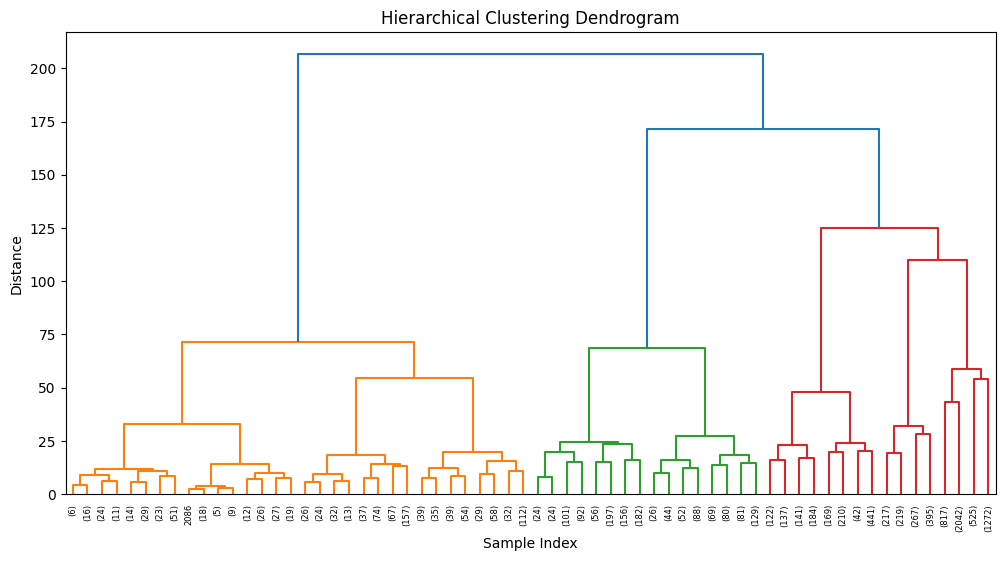

Stroke distribution per cluster:

cluster  stroke
1        1         0.795353
         0         0.204647
2        0         0.538426
         1         0.461574
Name: proportion, dtype: float64
Stroke distribution per cluster (in %):

stroke       0      1
cluster              
1        20.46  79.54
2        53.84  46.16


In [65]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Separate features and target ---
X = df.drop(columns=['stroke'])
y = df['stroke']

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Step 2: Preprocessing Pipeline ---
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

X_processed = preprocessor.fit_transform(X)

# --- Step 3: Apply SMOTE ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# --- Step 4: Hierarchical Clustering ---
Z = linkage(X_resampled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5, color_threshold=0.7 * max(Z[:, 2]))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# --- Step 5: Assign 2 Cluster Labels ---
num_clusters = 2
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

# --- Step 6: Analyze Clusters ---
cluster_df = pd.DataFrame(X_resampled)
cluster_df['stroke'] = y_resampled
cluster_df['cluster'] = cluster_labels

print("Stroke distribution per cluster:\n")
print(cluster_df.groupby('cluster')['stroke'].value_counts(normalize=True))


stroke_distribution = cluster_df.groupby('cluster')['stroke'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Stroke distribution per cluster (in %):\n")
print(stroke_distribution.round(2))



In [68]:
# --- Step 4: Apply K-Means clustering ---
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_resampled)

# --- Step 5: Prepare DataFrame with cluster labels and stroke info ---
# Convert X_resampled to DataFrame for convenience (handle sparse matrix if any)
if hasattr(X_resampled, "toarray"):
    X_resampled_df = pd.DataFrame(X_resampled.toarray())
else:
    X_resampled_df = pd.DataFrame(X_resampled)

X_resampled_df['stroke'] = y_resampled.reset_index(drop=True)
X_resampled_df['kmeans_cluster'] = kmeans.labels_

# --- Step 6: Stroke counts per cluster ---
stroke_counts = X_resampled_df.groupby(['kmeans_cluster', 'stroke']).size()
print("Stroke counts per cluster:")
print(stroke_counts)

# --- Step 7: Stroke percentages per cluster ---
stroke_percentages = X_resampled_df.groupby('kmeans_cluster')['stroke'].value_counts(normalize=True).unstack(fill_value=0) * 100
stroke_percentages.columns = ['No Stroke (%)', 'Stroke (%)']
print("\nStroke percentages per cluster:")
print(stroke_percentages)



Stroke counts per cluster:
kmeans_cluster  stroke
0               0          229
                1          890
1               0         4631
                1         3970
dtype: int64

Stroke percentages per cluster:
                No Stroke (%)  Stroke (%)
kmeans_cluster                           
0                   20.464701   79.535299
1                   53.842576   46.157424


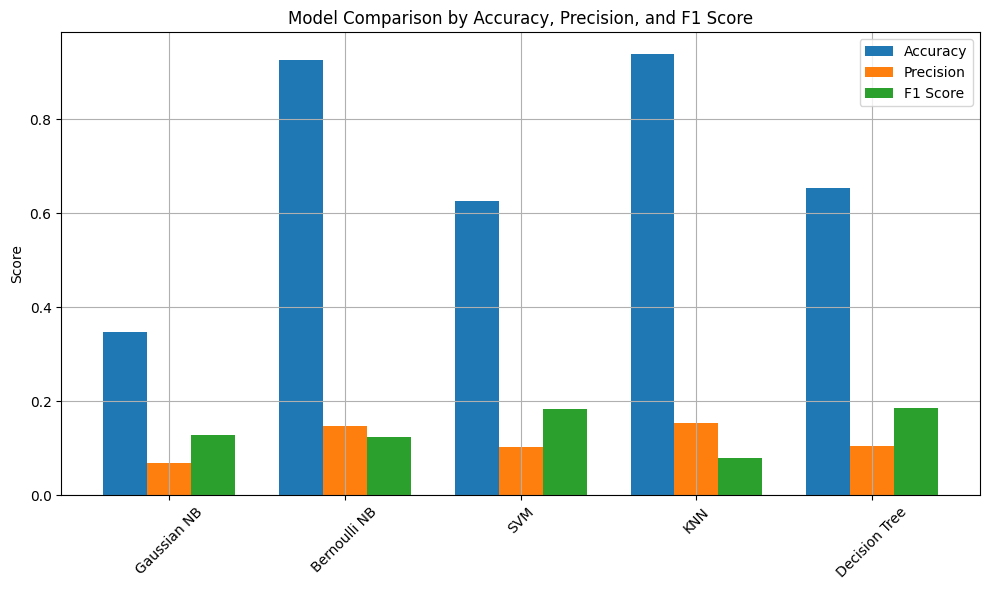

In [55]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Dictionaries to store metrics
accuracy_scores = {}
precision_scores = {}
f1_scores = {}

# Calculate metrics for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, zero_division=0)
    f1_scores[name] = f1_score(y_test, y_pred, zero_division=0)

# Combine into a single structure
metrics = {
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'F1 Score': f1_scores
}

# Plotting
model_names = list(models.keys())
x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, [accuracy_scores[m] for m in model_names], width, label='Accuracy')
ax.bar(x, [precision_scores[m] for m in model_names], width, label='Precision')
ax.bar(x + width, [f1_scores[m] for m in model_names], width, label='F1 Score')

ax.set_ylabel('Score')
ax.set_title('Model Comparison by Accuracy, Precision, and F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()
